In [1]:
 !pip install pydub

You should consider upgrading via the 'c:\users\lenovo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# Import libraries
import librosa
import librosa.display
import soundfile as sf
from scipy.io.wavfile import write,read #write array to wav file
import pydub
from pydub import AudioSegment
from pydub.utils import mediainfo
import IPython.display as ipd  # To play sound in the notebook

import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram

import os
import sys
import warnings
import pathlib
import ntpath
import pandas as pd
from scipy.stats import skew
from pandas import ExcelWriter
import glob 
import numpy as np
import datetime
import seaborn as sns

ModuleNotFoundError: No module named 'librosa'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def audio_features(data_loc,peak_threshold,time_interval,sample_rate):
  data_path = pd.read_csv(data_loc)

  # Parameters
  peak_threshold = peak_threshold
  sec_window = time_interval

  tab = {'File_Name': [],'Data_Emotion': [], 'threshold':[], 'peak':[], 'peak_count':[],'std_overall':[],'skewness_overall':[], 'duration_sec':[], 'time':[],
        '#Interval_'+str(sec_window)+str('sec'):[] ,'#Cts_thesholdBreach_Int':[], 'max_thesholdBreach_Int':[], 'min_thesholdBreach_Int':[],'std_max(Int Value)':[]}

  for aud in data_path['Path']:
    # print(aud)
    sheet = ntpath.basename(aud).rstrip('.wav')
    data, sampling_rate = librosa.load(aud,sr=sample_rate) #default sampling rate(sr) of 22KHZ

    trim_window = pd.DataFrame(data).shape[0]/(sec_window*1000)   

    # Overall Features (Flat features)
    base = pd.DataFrame(data,columns=['wave'])
    peak = round(max(base['wave']),3)
    peak_count_overall = len(base[base['wave']>=peak_threshold])
    std = base['wave'].std()
    duration_sec = librosa.get_duration(data)
    time = str(datetime.timedelta(seconds=duration_sec))

    # Features on small interval
    chunks_data = np.array_split(data, trim_window)

    int_thsh_breach = []
    int_peak = []

    for arr in chunks_data:
      a= np.absolute(arr).max()
      base = pd.DataFrame(arr,columns=['wave'])
      peak_count = len(base[base['wave']>=peak_threshold])
      int_thsh_breach.append(peak_count)
      int_peak.append(a)


    int_base = [i for i in int_thsh_breach if i>1]

    #Add Features
    tab['File_Name'].append(aud)
    tab['Data_Emotion'].append(sheet)
    tab['threshold'].append(peak_threshold)
    tab['peak'].append(peak)
    tab['peak_count'].append(peak_count_overall)
    tab['std_overall'].append(std)
    tab['skewness_overall'].append(skew(np.absolute(base['wave'])))
    tab['duration_sec'].append(duration_sec)
    tab['time'].append(time)
  
    #Interval Features
    # tab['File_Name'].append(sheet)
    tab['#Interval_'+str(sec_window)+str('sec')].append(len(chunks_data))
    tab['#Cts_thesholdBreach_Int'].append(len(int_base))
    tab['max_thesholdBreach_Int'].append(max(int_base,default=0))
    tab['min_thesholdBreach_Int'].append(min(int_base,default=0))
    tab['std_max(Int Value)'].append(np.std(int_peak))

  summary = pd.DataFrame(tab)
  return summary

In [ ]:
tab = audio_features(data_loc= r'/content/drive/MyDrive/check/Tess_dataframe.csv',peak_threshold = 0.4,time_interval=5,sample_rate=None)
tab

,File_Name,Data_Emotion,threshold,peak,peak_count,std_overall,skewness_overall,duration_sec,time,#Interval_10sec,#Cts_thesholdBreach_Int,max_thesholdBreach_Int,min_thesholdBreach_Int,std_max(Int Value)
0,/content/drive/MyDrive/TESS Data/OAF_neutral/O...,OAF_near_neutral,0.4,0.039,0,0.011555,0.906744,2.105125,0:00:02.105125,4,0,0,0,0.003555
1,/content/drive/MyDrive/TESS Data/OAF_neutral/O...,OAF_date_neutral,0.4,0.060,0,0.014863,1.335348,2.150703,0:00:02.150703,4,0,0,0,0.006744
2,/content/drive/MyDrive/TESS Data/OAF_neutral/O...,OAF_half_neutral,0.4,0.051,0,0.013160,1.759086,2.069569,0:00:02.069569,4,0,0,0,0.009352
3,/content/drive/MyDrive/TESS Data/OAF_neutral/O...,OAF_get_neutral,0.4,0.045,0,0.011504,1.930666,2.098730,0:00:02.098730,4,0,0,0,0.005203
4,/content/drive/MyDrive/TESS Data/OAF_neutral/O...,OAF_reach_neutral,0.4,0.048,0,0.013720,2.166376,2.426440,0:00:02.426440,5,0,0,0,0.003478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,/content/drive/MyDrive/TESS Data/OAF_angry/OAF...,OAF_rose_angry,0.4,0.280,0,0.053923,2.759746,2.059728,0:00:02.059728,4,0,0,0,0.073137
796,/content/drive/MyDrive/TESS Data/OAF_angry/OAF...,OAF_rat_angry,0.4,0.240,0,0.041686,1.936553,1.700952,0:00:01.700952,3,0,0,0,0.054577
797,/content/drive/MyDrive/TESS Data/OAF_angry/OAF...,OAF_rot_angry,0.4,0.213,0,0.036702,1.480202,1.518776,0:00:01.518776,3,0,0,0,0.048457
798,/content/drive/MyDrive/TESS Data/OAF_angry/OAF...,OAF_thumb_angry,0.4,0.280,0,0.051827,2.322033,1.763265,0:00:01.763265,3,0,0,0,0.055631


In [ ]:
tab.to_csv('/content/drive/MyDrive/check/simple_vars.csv',index=False)

## Visualization

129
139
130
97


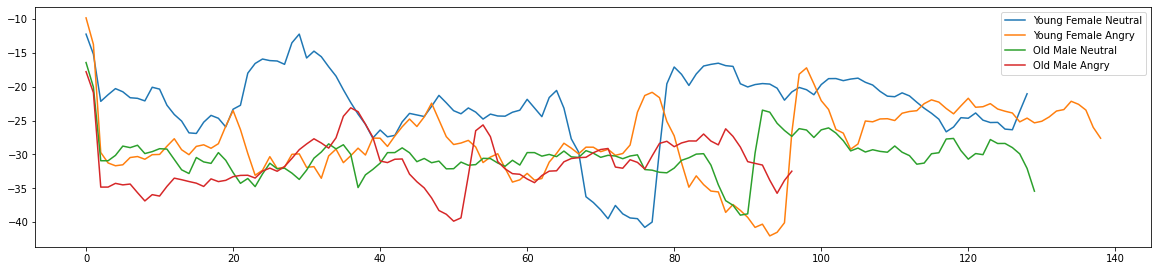

In [ ]:
# Source - TESS; Gender - Young Female; Emotion - Neutral 
path = "/content/drive/MyDrive/TESS Data/YAF_neutral/YAF_bar_neutral.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female_n = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female_n = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female_n))

# Source - TESS; Gender - Young Female; Emotion - Angry 
path = "/content/drive/MyDrive/TESS Data/YAF_angry/YAF_bar_angry.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - TESS; Gender -Old Male; Emotion - Neutral 
path = "/content/drive/MyDrive/TESS Data/OAF_neutral/OAF_bar_neutral.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male_n = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male_n = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male_n))

# Source - TESS; Gender -Old Male; Emotion - Angry 
path = "/content/drive/MyDrive/TESS Data/OAF_angry/OAF_bar_angry.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female_n, label='Young Female Neutral')
plt.plot(female, label='Young Female Angry')
plt.plot(male_n, label='Old Male Neutral')
plt.plot(male, label='Old Male Angry')
plt.legend()

*Obervations from above plots and analysis:*

*1.   Angry women voice pitch is always higher than mail voice irrespective of emotion*

*2.   Neutral women voice is lower or closer to male angry voice*




In [ ]:
# Data Visualization
def create_waveplot(data, sr, e):
    plt.figure(figsize=(15, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(15, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
    plt.colorbar()

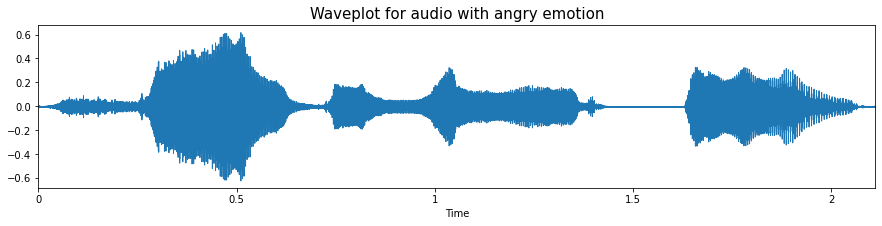

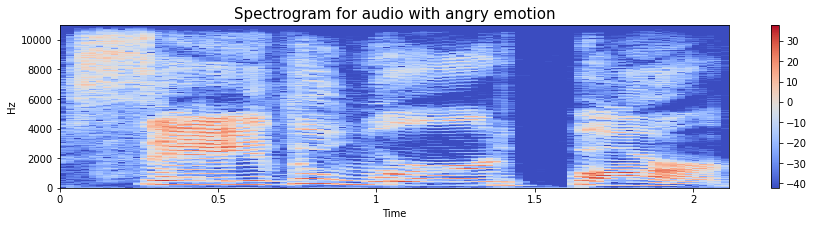

In [ ]:
gender = 'Y'
emotion='angry'
path = "/content/drive/MyDrive/TESS Data/"+str(gender)+"AF_"+str(emotion)+ "/"+str(gender)+"AF_bar_" +str(emotion)+ ".wav"
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

# TESS DATASET

In [ ]:
Tess = r'/content/drive/MyDrive/TESS2/'
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
emotion_df

#Dataframe for path and respective emotion 
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/TESS2/OAF_neutral/OAF_n...
1,neutral,/content/drive/MyDrive/TESS2/OAF_neutral/OAF_d...
2,neutral,/content/drive/MyDrive/TESS2/OAF_neutral/OAF_h...
3,neutral,/content/drive/MyDrive/TESS2/OAF_neutral/OAF_g...
4,neutral,/content/drive/MyDrive/TESS2/OAF_neutral/OAF_r...


In [ ]:
Tess_df.to_csv('/content/drive/MyDrive/check/Tess_dataframe.csv', index=False)

In [ ]:
Tess_df['Emotions'].value_counts()

neutral    400
angry       50
Name: Emotions, dtype: int64



---


Sounds travels as a wave. The amplitude of the wave is related to the amount of 
acoustic energy it carries, or how loud the sound will appear to be. **As the amplitude of the sound wave increases, the sound is perceived to be louder.** 

There are several different ways to describe the amplitude of a sound wave. It is important to be aware of the different methods for characterizing the loudness of a sound signal and how they differ from each other. Not all sounds are the same type of wave, and some ways of characterizing a sound wave are more appropriate than others depending on the type of wave. This section will describe the different ways in which a sound wave can be characterized.


---



In [ ]:
emotion='neutral'
path = np.array(Tess_df.Path[Tess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

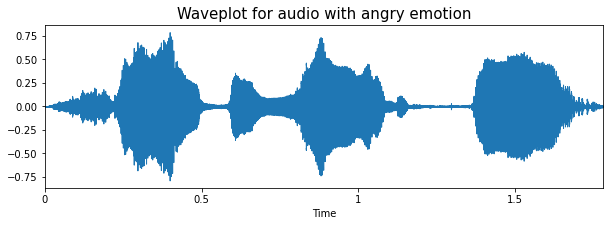

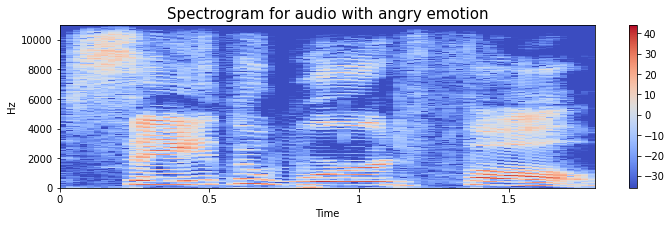

In [ ]:
emotion='angry'
path = np.array(Tess_df.Path[Tess_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
ipd.Audio(path)

# **Feature Extraction**


---


Extraction of features is a very important part in analyzing and finding relations between different things. As we already know that the data provided of audio cannot be understood by the models directly so we need to convert them into an understandable format for which feature extraction is used.

The audio signal is a three-dimensional signal in which three axes represent time, amplitude and frequency


---


**Important Audio Features:**


---



---


Zero Crossing Rate : The rate of sign-changes of the signal during the duration of a particular frame.

Energy : The sum of squares of the signal values, normalized by the respective frame length.

Entropy of Energy : The entropy of sub-frames’ normalized energies. It can be interpreted as a measure of abrupt changes.

Spectral Centroid : The center of gravity of the spectrum.

Spectral Spread : The second central moment of the spectrum.

Spectral Entropy : Entropy of the normalized spectral energies for a set of sub-frames.

Spectral Flux : The squared difference between the normalized magnitudes of the spectra of the two successive frames.

Spectral Rolloff : The frequency below which 90% of the magnitude distribution of the spectrum is concentrated.

MFCCs Mel Frequency Cepstral Coefficients form a cepstral representation where the frequency bands are not linear but distributed according to the mel-scale.

Chroma Vector : A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).

Chroma Deviation : The standard deviation of the 12 chroma coefficients.


In [ ]:
data_path = Tess_df
data_path.Path
data_path.Emotions.value_counts()

neutral    400
angry       50
Name: Emotions, dtype: int64

In [ ]:
# Data Augmentation
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

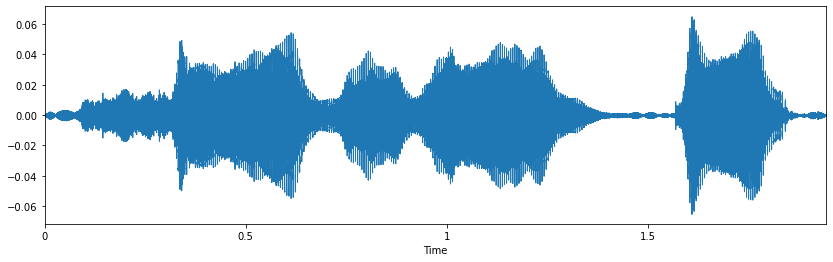

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
ipd.Audio(x, rate=sample_rate)

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft(short term Fourier Transformation -time-dependent signal to a frequency-dependent signal)
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC (Mel frequency cepstrum)
    mfcc = np.mean(librosa.feature.mfcc(y=data).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value(for sound intensity)
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram (Logarithmic transformation of a signal’s frequency)
    mel = np.mean(librosa.feature.melspectrogram(y=data).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

In [ ]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [ ]:
len(X), len(Y), data_path.Path.shape

(1350, 1350, (450,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
# Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,labels
0,0.031490,0.130015,0.239921,0.142915,0.106298,0.209890,0.519505,0.971039,0.515010,0.206681,0.138402,0.158218,0.106168,-551.820984,115.021851,27.668526,3.247138,18.753422,19.689495,-7.209020,-16.546284,-10.912905,-0.354167,-11.616244,-2.503260,-11.137400,3.993402,7.057513,2.635183,-6.154725,9.235930,-5.668811,-1.451442,0.010622,0.036268,0.001263,0.000189,0.000203,0.000420,0.082260,...,0.000025,0.000022,0.000026,0.000008,0.000003,0.000002,3.221098e-06,2.896672e-06,1.816005e-06,1.188648e-06,1.540157e-06,2.591802e-06,5.073953e-06,0.000006,0.000004,0.000005,0.000005,0.000005,0.000003,0.000002,2.683853e-06,3.306469e-06,0.000004,0.000005,0.000003,3.511662e-06,0.000005,0.000003,0.000002,2.694477e-06,3.833184e-06,8.228307e-06,0.000007,0.000007,0.000005,0.000003,1.376751e-06,4.835047e-07,7.233589e-08,neutral
1,0.034659,0.162968,0.271425,0.174866,0.138638,0.241636,0.534031,0.971556,0.529141,0.230641,0.163101,0.187585,0.135236,-492.018745,78.202352,24.890152,9.229670,16.787435,12.385815,-3.671919,-14.098908,-8.957406,-2.849827,-5.818835,-6.108077,-6.044730,0.157148,5.486054,1.073223,-1.723287,3.371977,-2.035123,-2.433424,0.010628,0.036294,0.001267,0.000184,0.000200,0.000427,0.082275,...,0.000031,0.000029,0.000033,0.000016,0.000010,0.000010,9.270884e-06,8.990371e-06,8.407907e-06,8.784929e-06,7.840585e-06,8.416412e-06,1.085320e-05,0.000010,0.000010,0.000011,0.000011,0.000011,0.000010,0.000008,9.241155e-06,9.566018e-06,0.000010,0.000012,0.000010,9.823669e-06,0.000010,0.000009,0.000009,9.174390e-06,1.056341e-05,1.432563e-05,0.000013,0.000014,0.000012,0.000010,7.726036e-06,7.781596e-06,7.196849e-06,neutral
2,0.029318,0.103554,0.126239,0.232094,0.114994,0.085501,0.196517,0.540238,0.984197,0.519203,0.225199,0.137222,0.167283,-614.013062,115.485695,23.662258,3.567491,23.300034,19.900602,-10.183661,-15.623330,-4.783384,-1.445883,-13.155528,-6.326929,-9.489088,8.199527,4.990586,-4.226267,-5.400172,5.280525,-12.056442,-0.359113,0.005503,0.008340,0.000410,0.000108,0.000134,0.000224,0.007669,...,0.000001,0.000003,0.000005,0.000008,0.000006,0.000001,7.901402e-07,7.974220e-07,6.016970e-07,5.355025e-07,3.212257e-07,4.813987e-07,5.935637e-07,0.000001,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,8.713861e-07,7.507321e-07,0.000002,0.000001,0.000001,8.507211e-07,0.000001,0.000001,0.000001,4.298771e-07,6.388941e-07,8.918643e-07,0.000001,0.000002,0.000002,0.000002,8.743280e-07,1.949494e-07,3.044588e-08,neutral
3,0.030012,0.217053,0.249488,0.327416,0.250931,0.316497,0.438156,0.680143,0.876088,0.382577,0.211609,0.210264,0.244540,-540.281311,88.737694,20.010578,12.624619,25.670801,6.587505,-3.734864,-3.819873,-14.003771,-7.741927,-11.290822,-1.132537,-3.485945,1.163161,3.031949,5.649757,-0.643024,8.478916,-1.821894,0.137381,0.013307,0.037273,0.003226,0.003131,0.003673,0.005766,0.030775,...,0.000059,0.000056,0.000029,0.000014,0.000006,0.000003,2.365365e-06,3.740377e-06,4.884042e-06,4.531802e-06,6.210855e-06,1.385900e-05,4.131118e-05,0.000016,0.000008,0.000008,0.000012,0.000018,0.000036,0.000029,1.580865e-05,1.100023e-05,0.000018,0.000021,0.000020,2.062613e-05,0.000015,0.000009,0.000010,1.362441e-05,1.268994e-05,1.430642e-05,0.000019,0.000023,0.000014,0.000014,1.691726e-05,6.331775e-06,2.460287e-07,neutral
4,0.128511,0.343446,0.382276,0.449839,0.373657,0.412671,0.486117,0.696204,0.903929,0.480839,0.336003,0.339396,0.366544,-392.979461,38.266226,14.226118,9.572207,10.400704,3.518889,-1.478517,-5.041450,-8.468263,-8.082471,-6.322144,-5.574761,-4.002849,-1.714228,1.740177,1.997731,1.900915,2.263998,1.097940,1.634993,0.013488,0.037138,0.003410,0.003312,0.004108,0.005953,0.031128,...,0.000218,0.000219,0.000185,0.000154,0.000136,0.000149,1.415249e-04,1.411994e-04,1.678576e-04,1.495194e-04

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
# from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

In [ ]:
keras.__version__
# sys.version

'2.5.0'

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
# splitting data
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, shuffle=True,test_size=1 - train_ratio)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test,random_state=1, shuffle=True, test_size=test_ratio/(test_ratio + validation_ratio)) 
print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(944, 162) (203, 162) (203, 162)
(944, 2) (203, 2) (203, 2)


In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)
x_train.shape, y_train.shape, x_test.shape, y_test.shape,x_val.shape, y_val.shape

((944, 162), (944, 2), (203, 162), (203, 2), (203, 162), (203, 2))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_val = np.expand_dims(x_val, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape,x_val.shape, y_val.shape

((944, 162, 1), (944, 2), (203, 162, 1), (203, 2), (203, 162, 1), (203, 2))

## Basic Model

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=2, activation='sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 81, 256)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 21, 128)          

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val), callbacks=[rlrp])

Epoch 1/10
15/15 [==============================] - 8s 442ms/step - loss: 0.5186 - accuracy: 0.7270 - val_loss: 0.2525 - val_accuracy: 0.9212
Epoch 2/10
15/15 [==============================] - 6s 401ms/step - loss: 0.2808 - accuracy: 0.9055 - val_loss: 0.1610 - val_accuracy: 0.9507
Epoch 3/10
15/15 [==============================] - 6s 404ms/step - loss: 0.1550 - accuracy: 0.9569 - val_loss: 0.1141 - val_accuracy: 0.9557
Epoch 4/10
15/15 [==============================] - 6s 401ms/step - loss: 0.1216 - accuracy: 0.9633 - val_loss: 0.0875 - val_accuracy: 0.9557
Epoch 5/10
15/15 [==============================] - 6s 402ms/step - loss: 0.0896 - accuracy: 0.9769 - val_loss: 0.0242 - val_accuracy: 0.9951
Epoch 6/10
15/15 [==============================] - 6s 401ms/step - loss: 0.0623 - accuracy: 0.9718 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 6s 403ms/step - loss: 0.0366 - accuracy: 0.9930 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 

7/7 [==============================] - 0s 39ms/step - loss: 0.0160 - accuracy: 0.9951
Accuracy of our model on test data :  99.5073914527893 %


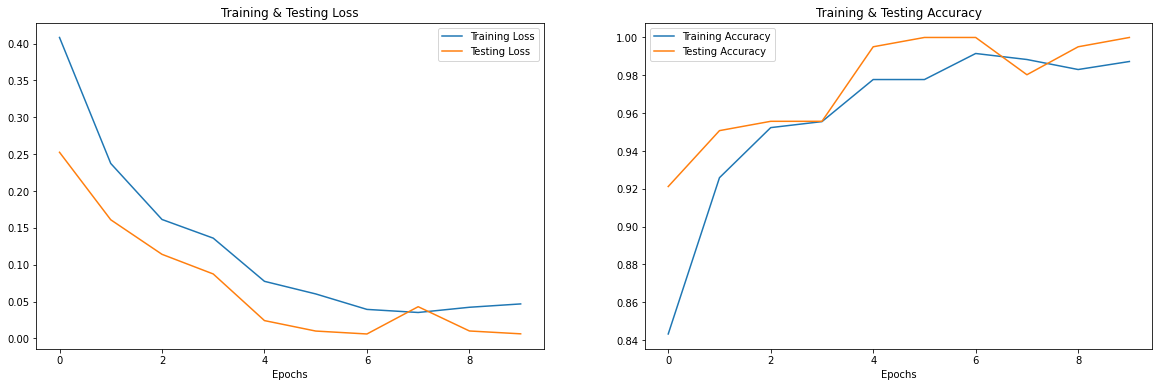

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

# predicting on val data.
pred_val = model.predict(x_val)
y_val_pred = encoder.inverse_transform(pred_val)
y_val = encoder.inverse_transform(y_val)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()
df.head(10)

df2 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df2['Predicted Labels'] = y_val_pred.flatten()
df2['Actual Labels'] = y_val.flatten()
df2.head(10)

,Predicted Labels,Actual Labels
0,neutral,neutral
1,neutral,neutral
2,neutral,neutral
3,neutral,neutral
4,neutral,neutral
5,neutral,neutral
6,neutral,neutral
7,neutral,neutral
8,neutral,neutral
9,neutral,neutral


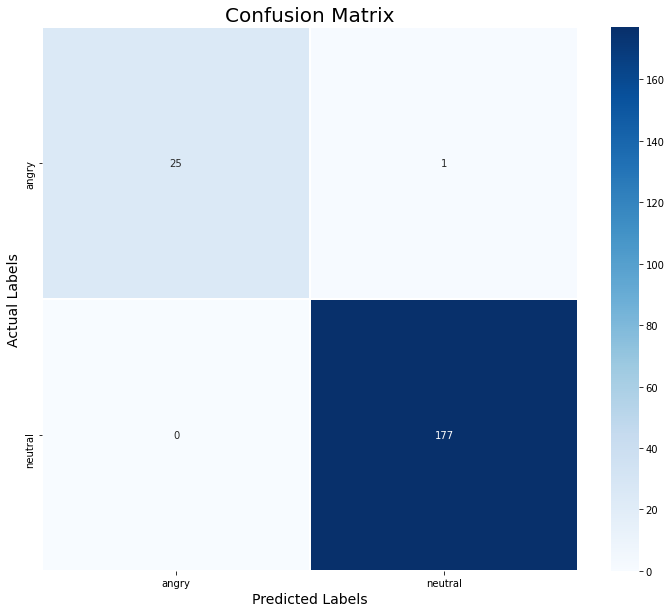

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       1.00      0.96      0.98        26
     neutral       0.99      1.00      1.00       177

    accuracy                           1.00       203
   macro avg       1.00      0.98      0.99       203
weighted avg       1.00      1.00      1.00       203



#FASTAI Classification Model

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()